# Modules à importer

In [13]:
import re
import glob
import math
import scipy
import pickle
import sncosmo
import numpy as np
import pandas as pd
import iminuit as im
import ipywidgets as ipw
from astropy.io import fits
from scipy.stats import poisson
from snprop import survey, tools
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from matplotlib.patches import Ellipse
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
plt.rcParams['figure.facecolor'] = 'w'
import random

### Exo 1

In [11]:
k = {750:1.8e-4, 800:2.7e-3, 850:3.0e-2, 900:0.26}
df = pd.DataFrame(k, index=[0])

In [12]:
df

,750,800,850,900
0,0.00018,0.0027,0.03,0.26


In [52]:
T = np.asarray(list(k.keys())).reshape((-1,1))
lnT = np.log(T)
usT = 1/T
K = np.asarray(list(k.values()))
lnK = np.log(K)
model = LinearRegression().fit(usT,lnK)
r_sq = model.score(usT,lnK)
a = model.coef_[0]
b = model.intercept_

In [ ]:
ax.get_ylim()

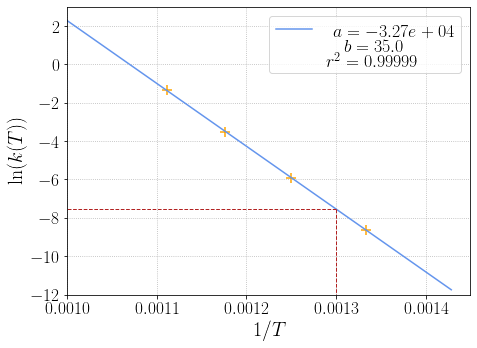

In [123]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

Tlin = np.linspace(700, 1000, 500)
usTlin = 1/Tlin
ax.plot(usTlin, a*usTlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.1f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(usT,lnK, marker='+', color='orange', s=100)

ax.plot([0.0013, 0.0013],
        [ax.get_ylim()[0], a*0.0013+b],
        'firebrick', ls='--', lw=1)
ax.plot([0.0013, 0.001],
        [a*0.0013+b, a*0.0013+b],
        'firebrick', ls='--', lw=1)

ax.set_xlim(left=0.001)
ax.set_ylim(bottom=-12)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('$1/T$', fontsize=20)
ax.set_ylabel('$\ln(k(T))$', fontsize=20)

ax.legend(loc='upper right', fontsize=18)

fig.savefig('exo1_lnk.pdf', bbox_inches='tight')

### Exo 2

In [141]:
data = {'$t$ (min)': [0, 3.25, 8.02, 12.18, 17.3, 24.55, 33.0, 43.0, 55.08, 68.05, 90.1, 119],
     '$p_B$ (bar)': [0.843, 0.807, 0.756, 0.715, 0.670, 0.615, 0.565, 0.520, 0.465, 0.423, 0.366, 0.311]}
df = pd.DataFrame(data)
R = 8.314
T = 326 # K
df['$p_B$ (Pa)'] = df['$p_B$ (bar)']*1e5
df['[X]'] =  df['$p_B$ (Pa)']/(R*T)

In [142]:
t = np.asarray(df['$t$ (min)']).reshape((-1,1))
X = np.asarray(df['[X]'])
usX = 1/X
model = LinearRegression().fit(t,usX)
r_sq = model.score(t,usX)
a = model.coef_[0]
b = model.intercept_

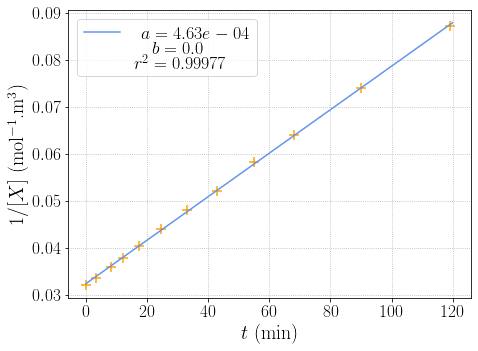

In [148]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

tlin = np.linspace(0, 120, 500)
ax.plot(tlin, a*tlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.1f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(t,usX, marker='+', color='orange', s=100)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('$t$ (min)', fontsize=20)
ax.set_ylabel(r'$1/[X]$ (mol$^{-1}$.m$^3$)', fontsize=20)

ax.legend(loc='upper left', fontsize=18)

fig.savefig('exo2_x.pdf', bbox_inches='tight')

### Exo 3

In [149]:
data = {'$t$ (s)': [60, 120, 180, 240, 300],
     '$x$ (µmol/L)': [13, 25, 36, 46, 55]}
df = pd.DataFrame(data)
df['$x(t)/t$'] = df['$x$ (µmol/L)']/df['$t$ (s)']

In [158]:
t = np.asarray(df['$t$ (s)']).reshape((-1,1))
xtt = np.asarray(df['$x(t)/t$'])
model = LinearRegression().fit(t,xtt)
r_sq = model.score(t,xtt)
a = model.coef_[0]
b = model.intercept_

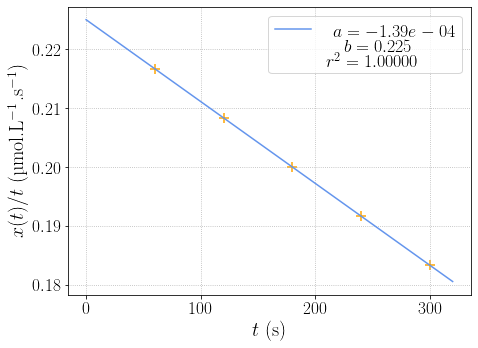

In [164]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

tlin = np.linspace(0, 320, 500)
ax.plot(tlin, a*tlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.3f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(t,xtt, marker='+', color='orange', s=100)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('$t$ (s)', fontsize=20)
ax.set_ylabel(r'$x(t)/t$ (µmol.L$^{-1}$.s$^{-1}$)', fontsize=20)

ax.legend(loc='upper right', fontsize=18)

fig.savefig('exo3_xtt.pdf', bbox_inches='tight')

In [165]:
data = {
        'v0': [5.7, 11.1, 22.5, 52, 99, 354],
        'Im': [2, 2, 2, 6, 6, 8],
        'Fe': [2, 4, 8, 2, 4, 8]}
df = pd.DataFrame(data)
df['X'] = df['Fe']*df['Im']**2

In [166]:
X = np.asarray(df['X']).reshape((-1,1))
v0 = np.asarray(df['v0'])
model = LinearRegression().fit(X,v0)
r_sq = model.score(X,v0)
a = model.coef_[0]
b = model.intercept_

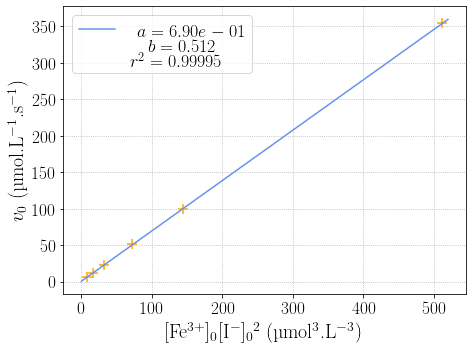

In [169]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

Xlin = np.linspace(0, 520, 500)
ax.plot(Xlin, a*Xlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.3f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(X,v0, marker='+', color='orange', s=100)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('[Fe$^{3+}$]$_0$[I$^-$]$_0${}$^2$ (µmol$^3$.L$^{-3}$)', fontsize=20)
ax.set_ylabel(r'$v_0$ (µmol.L$^{-1}$.s$^{-1}$)', fontsize=20)

ax.legend(loc='upper left', fontsize=18)

fig.savefig('exo3_v0.pdf', bbox_inches='tight')

### Exo 4

In [171]:
data = {
        'c0': [10, 25, 50, 75, 100],
        'tab': [1100, 445, 220, 150, 110]}
df = pd.DataFrame(data)
df['usc'] = 1/df['c0']

In [172]:
usc = np.asarray(df['usc']).reshape((-1,1))
tab = np.asarray(df['tab'])
model = LinearRegression().fit(usc,tab)
r_sq = model.score(usc,tab)
a = model.coef_[0]
b = model.intercept_

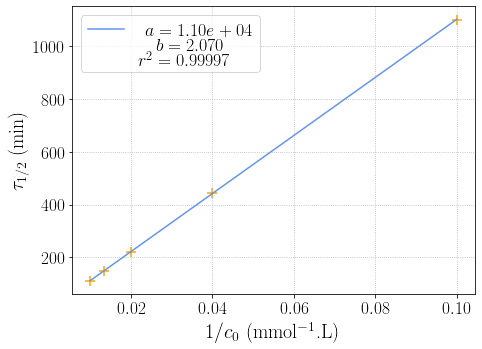

In [173]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

clin = np.linspace(np.min(usc), np.max(usc), 500)
ax.plot(clin, a*clin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.3f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(usc,tab, marker='+', color='orange', s=100)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel(r'$1/c_0$ (mmol$^{-1}$.L)', fontsize=20)
ax.set_ylabel(r'$\tau_{1/2}$ (min)', fontsize=20)

ax.legend(loc='upper left', fontsize=18)

fig.savefig('exo4_tab.pdf', bbox_inches='tight')

In [174]:
k = 1/a

In [175]:
k

9.100009100009101e-05

### Exo 5

In [177]:
data = {
        'A0': [0.470, 0.470, 0.470, 0.313],
        'B0': [0.235, 0.328, 0.448, 0.448],
        'v0': [15.7, 30.6, 57.1, 38.0]}
df = pd.DataFrame(data)
df['X'] = df['A0']*df['B0']**2

In [178]:
X = np.asarray(df['X']).reshape((-1,1))
v0 = np.asarray(df['v0'])
model = LinearRegression().fit(X,v0)
r_sq = model.score(X,v0)
a = model.coef_[0]
b = model.intercept_

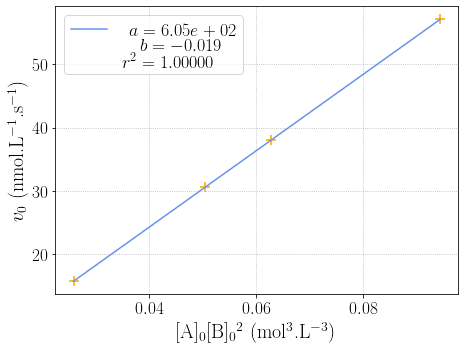

In [179]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

Xlin = np.linspace(np.min(X), np.max(X), 500)
ax.plot(Xlin, a*Xlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.3f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(X,v0, marker='+', color='orange', s=100)

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('[A]$_0$[B]$_0${}$^2$ (mol$^3$.L$^{-3}$)', fontsize=20)
ax.set_ylabel(r'$v_0$ (nmol.L$^{-1}$.s$^{-1}$)', fontsize=20)

ax.legend(loc='upper left', fontsize=18)

fig.savefig('exo5_k.pdf', bbox_inches='tight')

### Exo 6

In [194]:
data_1 = {
        't': [0, 1, 2, 3, 150],
        'a': [1, 0.5, 0.333, 0.25, 0]}
df_1 = pd.DataFrame(data_1)
data_2 = {
        't': [0, 0.5, 1, 1.5, 2],
        'a': [1, 0.585, 0.348, 0.205, 0.122]}
df_2 = pd.DataFrame(data_2)
df_2['lna'] = np.log(df_2['a'])

In [195]:
t = np.asarray(df_2['t']).reshape((-1,1))
lna = np.asarray(df_2['lna'])
model = LinearRegression().fit(t,lna)
r_sq = model.score(t,lna)
a = model.coef_[0]
b = model.intercept_

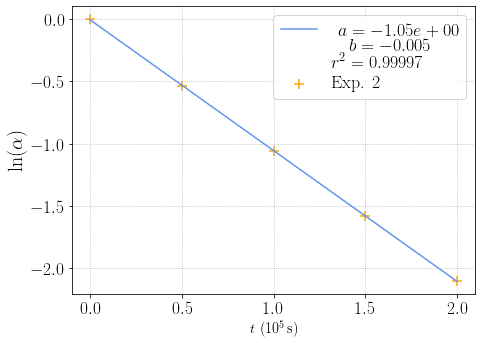

In [198]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

# ax.scatter(df_1['t'], df_1['a'], marker='+', color='orange', s=100, label='Exp. 1')
tlin = np.linspace(np.min(t), np.max(t), 500)
ax.plot(tlin, a*tlin + b, lw=1.5, color='cornflowerblue',
       label=fr'$a = {a:.2e}$\\ \hspace*{{26pt}}$b = {b:.3f}$\\ \hspace*{{8pt}}$r^2 = {r_sq:.5f}$')
ax.scatter(df_2['t'], df_2['lna'], marker='+', color='orange', s=100, label='Exp. 2')

ax.grid(linestyle=':')
ax.tick_params(labelsize='xx-large')

ax.set_xlabel('$t$ (10$^5$\,s)')
ax.set_ylabel(r'$\ln(\alpha)$', fontsize=20)

# ax.set_xlim(-0.1, 4)

ax.legend(loc='upper right', fontsize=18)

fig.savefig('exo6_a1.pdf', bbox_inches='tight')